# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

(Please insert the background here )

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import numpy as np
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2021-01-01,2021-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n\n        <meta charset="utf-8">\n\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n      '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [4]:
table = soup.find('div', attrs={'class':'lister-list'})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8179402">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8179402/">
    <img alt="Fate: The Winx Saga" class="loadlate" data-tconst="tt8179402" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BMzEyYzBhODYtZjZlOC00MTM4LWIxMjQtMTRhZjA5ODM4ZWI2XkEyXkFqcGdeQXVyODQwODA1MjY@._V1_UY98_CR5


Finding row length.

In [5]:
content = table.find_all("div", attrs={'class':'lister-item-content'})

In [6]:
row_length = len(content)
row_length

50

Do the scrapping process here (please change this markdown with your explanation)

In [7]:
temp = [] #initiating a tuple

for i in range(0, row_length):
    
    # Titles
    titles = content[i].find('a').text
        
    # Ratings and Metascores
    imdb_ratings = content[i].find('strong')
    if imdb_ratings is not None:
        imdb_ratings = imdb_ratings.text
    else: imdb_ratings = np.nan
    imdb_metascores = content[i].find('span', attrs={'class':'metascore mixed'})
    if imdb_metascores is not None:
        imdb_metascores = imdb_metascores.text
    else: imdb_metascores = np.nan
    
    # Votes
    imdb_votes = content[i].find('span', attrs={'name':'nv'})
    if imdb_votes is not None:
        imdb_votes = imdb_votes.text.replace(',','')
    else: imdb_votes = np.nan
    
    temp.append((titles, imdb_ratings, imdb_metascores, imdb_votes))
    
temp 

[('Fate: The Winx Saga', '6.9', nan, '44730'),
 ('The White Lotus', '7.6', nan, '67913'),
 ('Only Murders in the Building', '8.1', nan, '96528'),
 ('Abbott Elementary', '8.2', nan, '13828'),
 ('The Black Phone', '7.0', nan, '113724'),
 ('Resident Alien', '8.1', nan, '39292'),
 ('American Horror Stories', '6.2', nan, '20822'),
 ('1883', '8.8', nan, '63275'),
 ('Reservation Dogs', '8.1', nan, '14672'),
 ('Spider-Man: No Way Home', '8.3', nan, '730837'),
 ('La scuola cattolica', '5.7', nan, '1829'),
 ('Dune: Part One', '8.0', nan, '614759'),
 ('Licorice Pizza', '7.2', nan, '105814'),
 ('Forsvinningen på Lørenskog', '6.1', nan, '1096'),
 ('Dopesick', '8.6', nan, '54631'),
 ("NCIS: Hawai'i", '6.3', nan, '5548'),
 ('Mona Lisa and the Blood Moon', '6.2', nan, '1070'),
 ('The Little Things', '6.3', '54        ', '99699'),
 ('Bloodlands', '6.6', nan, '5086'),
 ('Arcane: League of Legends', '9.0', nan, '198005'),
 ('Yellowjackets', '7.9', nan, '44929'),
 ('The Wheel of Time', '7.1', nan, '102484

## Creating data frame & Data wrangling

Put the array into dataframe

In [8]:
import pandas as pd

df = pd.DataFrame(temp, columns=['Title', 'Rating', 'Metascore', 'Votes'])
df.head()

,Title,Rating,Metascore,Votes
0,Fate: The Winx Saga,6.9,NaN,44730
1,The White Lotus,7.6,NaN,67913
2,Only Murders in the Building,8.1,NaN,96528
3,Abbott Elementary,8.2,NaN,13828
4,The Black Phone,7.0,NaN,113724


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [9]:
#check tipe data
df.dtypes

Title        object
Rating       object
Metascore    object
Votes        object
dtype: object

In [10]:
# check missing value
df.isna().sum()

Title         0
Rating        0
Metascore    43
Votes         0
dtype: int64

In [11]:
#ubah format data
df[['Rating', 'Metascore', 'Votes']] = df[['Rating', 'Metascore', 'Votes']].astype('float64')
df['Votes'] = df['Votes']/10000
df['Metascore'] = df['Metascore']/10

# handle missing value dengan fillna
df = df.fillna(0)

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)

In [12]:
# import library
import matplotlib.pyplot as plt
import plotly.graph_objects as go


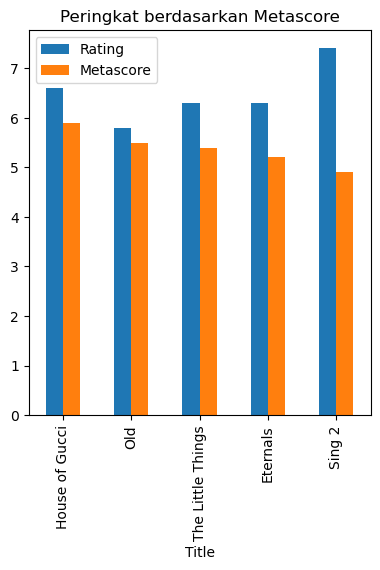

In [13]:
#Visualisasi rating dan metascore
fig = plt.figure(1, figsize=(15,5))

plt.subplot(1,3,1)
_ = df[['Title', 'Rating', 'Metascore']].set_index('Title').sort_values('Metascore', ascending=False)\
.head().plot.bar(ax=plt.gca(), title='Peringkat berdasarkan Metascore')



* Insight
<p align="justify">
    Berdasarkan visualisasi data diatas dapat mengetahui rating film berdasarkan metascore:
    <br>
    1. Film yang memiliki penilaian metascore oleh penonton tertinggi adalah film house of Gucci
    
</p>

In [14]:
#menyiapkan 10 film tertinggi berdasarkan rating
top5film = df.sort_values(by=['Rating'], ascending=False).head()

In [15]:
#membuat table plot 10 film dengan rating tertinggi
fig = go.Figure(data=[go.Table(header=dict(values=['Title','Rating','Votes'],fill_color='paleturquoise',height=30,align='left',font=dict(color='black', size=13)),
                              cells = dict(values=[top5film['Title'], top5film['Rating'],top5film['Votes']],fill_color='lavender',height=30,align='left'))])
fig.update_layout(title_text="Top 10 Film")

fig.show()

* Insight
<p align="justify">
    Berdasarkan visualisasi data diatas dapat mengetahui judul film memiliki rating tertinggi:
    <br>
    1. Film yang memiliki rating tertinggi yaitu berjudul Aarcane: League of Legends
    <br>
    
</p>

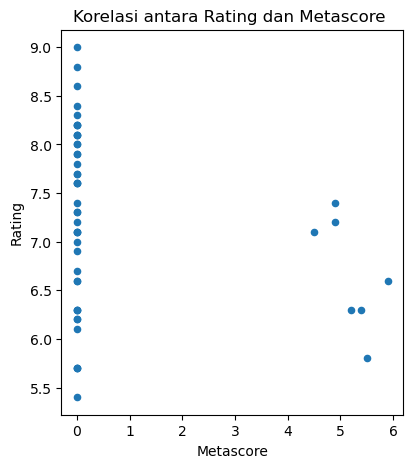

In [16]:
#melihat korelasi antar variabel metascore dan rating
fig = plt.figure(1, figsize=(15,5))
plt.subplot(1,3,3)
_ = df.plot.scatter(x='Metascore', y='Rating', ax=plt.gca(), title="Korelasi antara Rating dan Metascore ")

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

Berdasarkan hasil pengolahan data yang diambil dari 50 film paling populer didapatkan di IMDB
saya menggunakan tiga pendekatan berbeda
1. Pendekatan pertama yang saya ambil adalah untuk mendapatkan 7 film teratas berdasarkan penilaian suara
2. Pendekatan kedua saya mendapatkan 10 film memiliki rating tertinggi beserta votes dari penonton menggunakan tabel plot
3. Pendekatan ketiga saya membuat scatterplot untuk mengetahui hubungan antar variabel  rating dengan metascore
<br>

Tiga pendekatan berbeda yang saya sajikan dalam catatan ini adalah untuk menentukan perbedaan antara metode penilaian, Jika kita amati diagram batang ternyata 5 film yang memiliki nilai metascore tertinggi tidak masuk dalam film dengan rating tertinggi, lalu kita amati tabel top rating 5 film penilaian penonton terbesar pada film dengan rating 9.0 hal ini mungkin dapat menjadi acuan penonton untuk menonton film tersebut. kelima film dengan top rating merupakan film bergenre sama. dan korelasi antar variabel dapat kita amati di scatter plot menunjukan tidak adanya hubungan namun untuk  variabel rating memiliki pola yang sama




### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

In [17]:
print(np.__version__)

1.23.1
